In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
encoding_list = ['ascii','big5','big5hkscs','cp037','cp273','cp424','cp437',
                 'cp500','cp720','cp737','cp775','cp850','cp852','cp855',
                 'cp856','cp857','cp858','cp860','cp861','cp862','cp863',
                 'cp864','cp865','cp866','cp869','cp874','cp875','cp932','cp949',
                 'cp950','cp1006','cp1026','cp1125','cp1140','cp1250','cp1251',
                 'cp1252','cp1253','cp1254','cp1255','cp1256','cp1257','cp1258',
                 'euc_jp','euc_jis_2004','euc_jisx0213','euc_kr','gb2312','gbk',
                 'gb18030','hz','iso2022_jp','iso2022_jp_1','iso2022_jp_2',
                 'iso2022_jp_2004','iso2022_jp_3','iso2022_jp_ext','iso2022_kr',
                 'latin_1','iso8859_2','iso8859_3','iso8859_4','iso8859_5','iso8859_6',
                 'iso8859_7','iso8859_8','iso8859_9','iso8859_10','iso8859_11',
                 'iso8859_13','iso8859_14','iso8859_15','iso8859_16','johab',
                 'koi8_r','koi8_t','koi8_u','kz1048','mac_cyrillic','mac_greek',
                 'mac_iceland','mac_latin2','mac_roman','mac_turkish','ptcp154',
                 'shift_jis','shift_jis_2004','shift_jisx0213','utf_32','utf_32_be',
                 'utf_32_le','utf_16','utf_16_be','utf_16_le','utf_7','utf_8','utf_8_sig']

for enc in encoding_list:
    try:
        data = pd.read_csv('../_data/Online_Retail.csv', encoding=enc)
        print(enc)
    except:
        continue

cp437
cp720
cp737
cp775
cp850
cp852
cp855
cp857
cp858
cp860
cp861
cp862
cp863
cp864
cp865
cp866
cp869
cp874
cp932
cp1006
cp1125
cp1250
cp1251
cp1252
cp1253
cp1254
cp1255
cp1256
cp1257
cp1258
latin_1
iso8859_2
iso8859_3
iso8859_4
iso8859_5
iso8859_7
iso8859_8
iso8859_9
iso8859_10
iso8859_11
iso8859_13
iso8859_14
iso8859_15
iso8859_16
koi8_r
koi8_t
koi8_u
kz1048
mac_cyrillic
mac_greek
mac_iceland
mac_latin2
mac_roman
mac_turkish
ptcp154
shift_jis
shift_jis_2004
shift_jisx0213
utf_16_be
utf_16_le


In [3]:
data = pd.read_csv('../_data/Online_Retail.csv', encoding='iso8859_2')

In [4]:
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,1/12/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,1/12/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,1/12/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,1/12/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,1/12/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,9/12/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,9/12/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,9/12/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,9/12/2011 12:50,4.15,12680.0,France


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [6]:
data.isna().sum() / data.shape[0] * 100

InvoiceNo       0.000000
StockCode       0.000000
Description     0.268311
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     24.926694
Country         0.000000
dtype: float64

In [7]:
data.dropna(inplace=True)
data.reset_index(drop=True, inplace=True)

# Feature Extraction:

In [8]:
data['TotalPrice'] = data['Quantity'] * data['UnitPrice']
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

In [9]:
total_quantity = []
total_rquantity = []

cdata = data.groupby('CustomerID', group_keys=True).apply(lambda x: x)

for cid in np.unique([c[0] for c in cdata.index]):
    total_quantity.append(cdata.loc[cid]['Quantity'][cdata.loc[cid]['Quantity']>0].sum())
    total_rquantity.append(-cdata.loc[cid]['Quantity'][cdata.loc[cid]['Quantity']<0].sum())
    

total_price = []
total_rprice = []
for cid in np.unique([c[0] for c in cdata.index]):
    total_price.append(cdata.loc[cid]['TotalPrice'][cdata.loc[cid]['TotalPrice']>0].sum())
    total_rprice.append(-cdata.loc[cid]['TotalPrice'][cdata.loc[cid]['TotalPrice']<0].sum())


customer_data = pd.DataFrame({'#Invoice': data.groupby('CustomerID')['InvoiceNo'].nunique(),
                              '#Item': data.groupby('CustomerID')['StockCode'].nunique(),
                              '#Quantity': total_quantity,
                              '#RQuantity': total_rquantity,
                              'TotalPrice': total_price,
                              'TotalRPrice': total_rprice})

customer_data['MeanPrice'] = customer_data['TotalPrice'] / customer_data['#Quantity']
customer_data['MeanPrice'] = customer_data['MeanPrice'].fillna(0)

In [10]:
customer_data

,#Invoice,#Item,#Quantity,#RQuantity,TotalPrice,TotalRPrice,MeanPrice
CustomerID,,,,,,,
12346.0,2,1,74215,74215,77183.60,77183.60,1.040000
12347.0,7,103,2458,0,4310.00,-0.00,1.753458
12348.0,4,22,2341,0,1797.24,-0.00,0.767723
12349.0,1,73,631,0,1757.55,-0.00,2.785341
12350.0,1,17,197,0,334.40,-0.00,1.697462
...,...,...,...,...,...,...,...
18280.0,1,10,45,0,180.60,-0.00,4.013333
18281.0,1,7,54,0,80.82,-0.00,1.496667
18282.0,3,12,103,5,178.05,1.45,1.728641


In [13]:
from sklearn.cluster import AgglomerativeClustering as Agg
from scipy.cluster.hierarchy import dendrogram

In [14]:
# https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

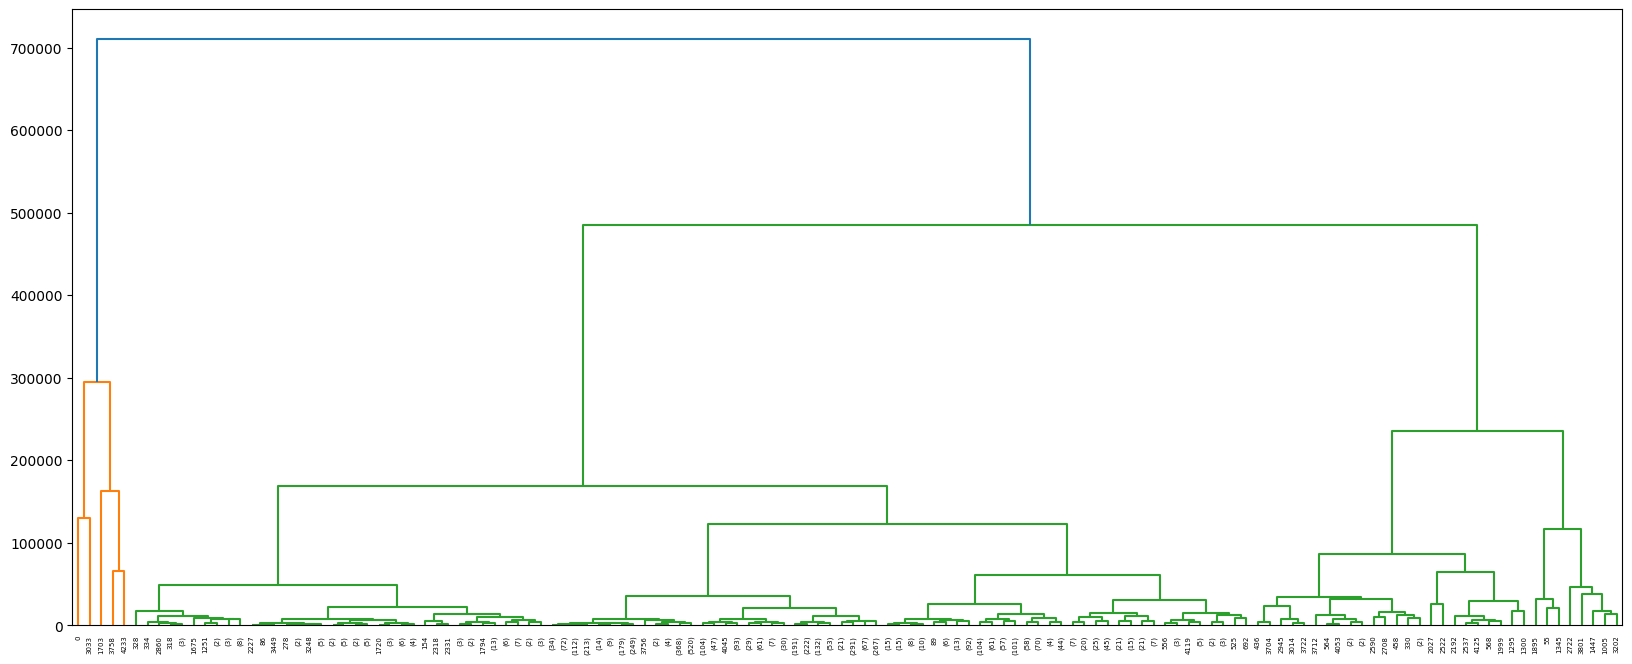

In [22]:
model = Agg(n_clusters=None,
            distance_threshold=0, 
            linkage='ward').fit(customer_data)
plt.figure(figsize=(20, 8))
plot_dendrogram(model=model, truncate_mode='level', p=8)

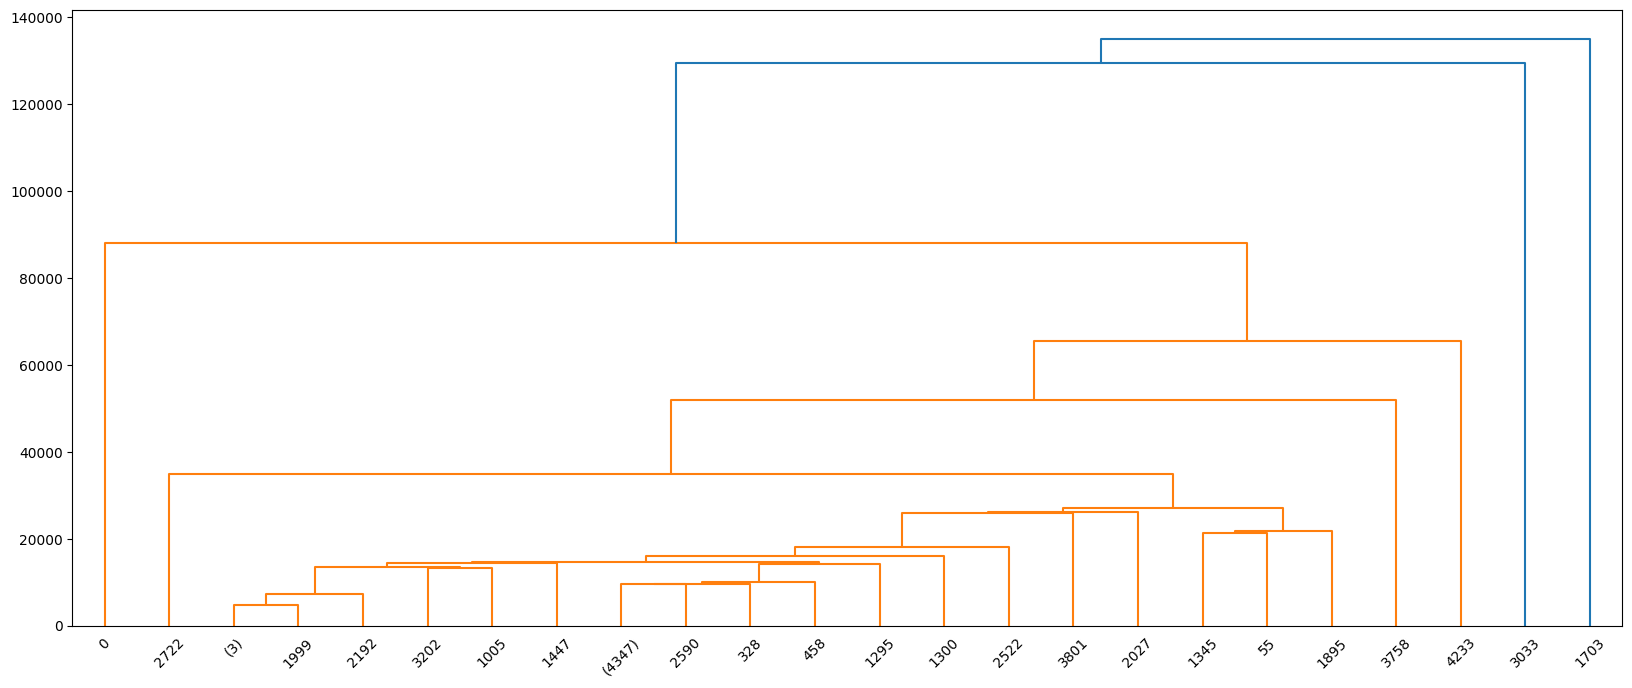

In [26]:
model = Agg(n_clusters=None,
            distance_threshold=0, 
            linkage='single').fit(customer_data)

plt.figure(figsize=(20, 8))
plot_dendrogram(model=model, truncate_mode='level', p=15)

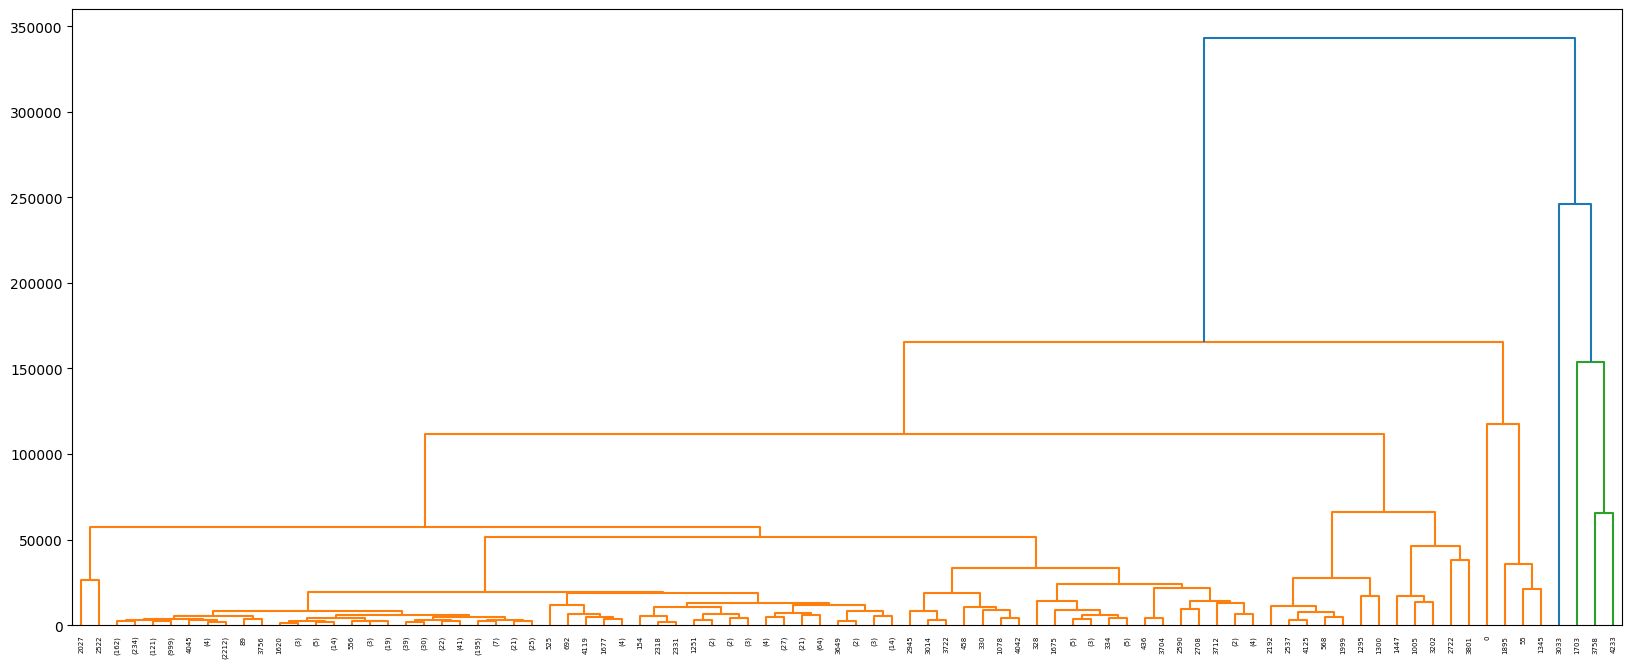

In [28]:
model = Agg(n_clusters=None,
            distance_threshold=0, 
            linkage='complete').fit(customer_data)

plt.figure(figsize=(20, 8))
plot_dendrogram(model=model, truncate_mode='level', p=10)

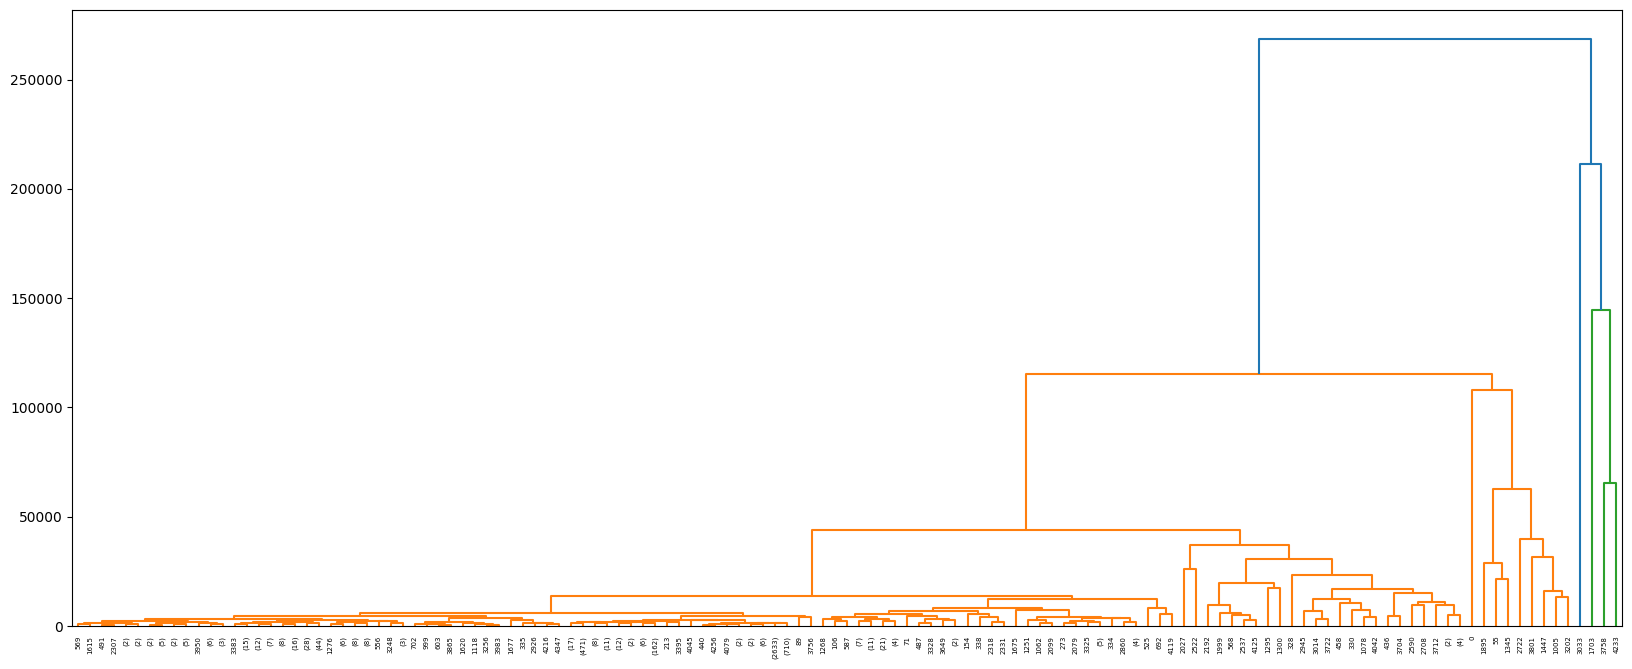

In [29]:
model = Agg(n_clusters=None,
            distance_threshold=0, 
            linkage='average').fit(customer_data)

plt.figure(figsize=(20, 8))
plot_dendrogram(model=model, truncate_mode='level', p=10)

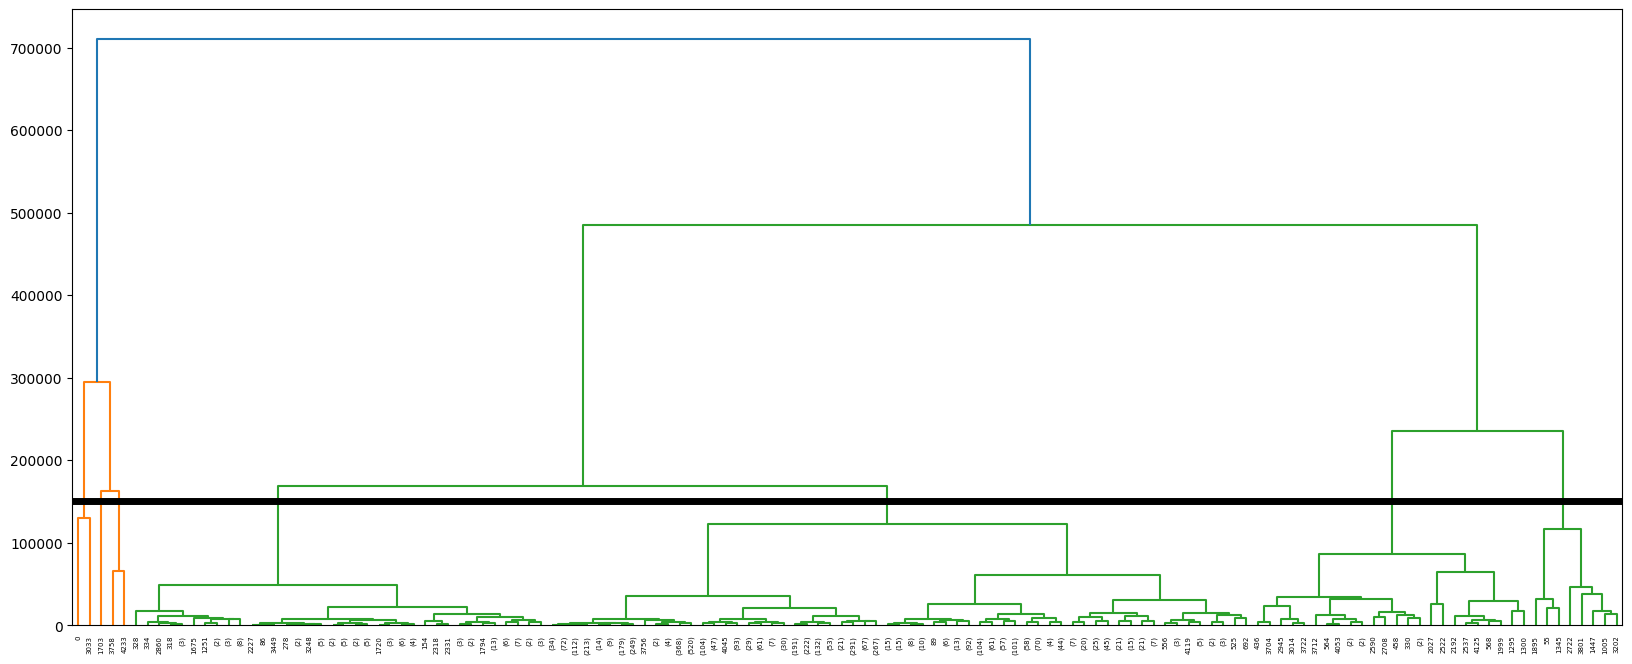

In [37]:
model = Agg(n_clusters=None,
            distance_threshold=0, 
            linkage='ward').fit(customer_data)
plt.figure(figsize=(20, 8))
plot_dendrogram(model=model, truncate_mode='level', p=8)
plt.axhline(150000, c='black', linewidth=5);

In [38]:
label = Agg(n_clusters=7, linkage='ward').fit_predict(customer_data)

In [39]:
np.unique(label)

array([0, 1, 2, 3, 4, 5, 6])

In [40]:
customer_data.loc[label==0, :]

,#Invoice,#Item,#Quantity,#RQuantity,TotalPrice,TotalRPrice,MeanPrice
CustomerID,,,,,,,
12346.0,2,1,74215,74215,77183.6,77183.6,1.040000
16446.0,3,3,80997,80995,168472.5,168469.6,2.079984


In [41]:
customer_data.loc[label==1, :]

,#Invoice,#Item,#Quantity,#RQuantity,TotalPrice,TotalRPrice,MeanPrice
CustomerID,,,,,,,
12347.0,7,103,2458,0,4310.00,-0.00,1.753458
12348.0,4,22,2341,0,1797.24,-0.00,0.767723
12349.0,1,73,631,0,1757.55,-0.00,2.785341
12350.0,1,17,197,0,334.40,-0.00,1.697462
12352.0,11,59,536,66,2506.04,960.63,4.675448
...,...,...,...,...,...,...,...
18280.0,1,10,45,0,180.60,-0.00,4.013333
18281.0,1,7,54,0,80.82,-0.00,1.496667
18282.0,3,12,103,5,178.05,1.45,1.728641


In [42]:
customer_data.loc[label==2, :]

,#Invoice,#Item,#Quantity,#RQuantity,TotalPrice,TotalRPrice,MeanPrice
CustomerID,,,,,,,
12415.0,26,444,77670,428,124914.53,1189.08,1.608273
13694.0,60,369,63312,1509,65039.62,2386.52,1.027287
14156.0,66,716,57885,860,117379.63,3995.49,2.027807
14298.0,45,884,58343,322,51527.30,664.86,0.883179
14911.0,248,1794,80515,3335,143825.06,11252.44,1.786314
16029.0,76,46,40208,8060,81024.84,30032.23,2.015142
16684.0,31,120,50255,865,66653.56,761.48,1.326307
17511.0,46,467,64549,1537,91062.38,2937.00,1.410748


In [43]:
customer_data.loc[label==3, :]

,#Invoice,#Item,#Quantity,#RQuantity,TotalPrice,TotalRPrice,MeanPrice
CustomerID,,,,,,,
17450.0,55,127,69993,964,194550.79,7068.62,2.779575
18102.0,62,151,64124,2,259657.30,3218.81,4.049300


In [44]:
customer_data.loc[label==4, :]

,#Invoice,#Item,#Quantity,#RQuantity,TotalPrice,TotalRPrice,MeanPrice
CustomerID,,,,,,,
12748.0,224,1769,25748,1538,33719.73,4647.63,1.309606
12901.0,36,32,23075,2160,17654.54,1361.44,0.765094
12931.0,20,29,28004,4627,42055.96,8593.15,1.501784
13081.0,21,511,19160,139,28337.38,372.90,1.478986
13089.0,118,636,31070,283,58825.83,1439.95,1.893332
13098.0,41,163,15968,57,28882.44,223.56,1.808770
13408.0,81,236,16232,113,28117.04,629.63,1.732198
13777.0,41,40,12897,93,25977.16,228.81,2.014202
13798.0,63,115,23948,434,37153.85,802.43,1.551439


In [45]:
customer_data.loc[label==5, :]

,#Invoice,#Item,#Quantity,#RQuantity,TotalPrice,TotalRPrice,MeanPrice
CustomerID,,,,,,,
12409.0,7,91,5551,8,11072.67,15.74,1.994716
12428.0,12,258,3536,33,7956.46,79.26,2.250130
12433.0,7,219,11071,0,13375.87,-0.00,1.208190
12451.0,6,265,6575,120,9035.52,102.00,1.374224
12471.0,49,152,8212,247,19824.05,1083.13,2.414034
...,...,...,...,...,...,...,...
17865.0,27,191,5757,59,10526.32,367.78,1.828438
18092.0,12,28,4252,2,9068.26,2.50,2.132705
18109.0,31,120,4237,18,8052.97,127.65,1.900630


In [46]:
customer_data.loc[label==6, :]

,#Invoice,#Item,#Quantity,#RQuantity,TotalPrice,TotalRPrice,MeanPrice
CustomerID,,,,,,,
14646.0,77,703,197491,772,280206.02,717.0,1.418829


In [47]:
customer_data['label'] = label

In [48]:
clustered_data = customer_data[customer_data['label'] != 0]
clustered_data = clustered_data[clustered_data['label'] != 3]
clustered_data = clustered_data[clustered_data['label'] != 6]


In [50]:
clustered_data['label'].value_counts()

1    4230
5     102
4      27
2       8
Name: label, dtype: int64

In [51]:
clustered_data['label'] = clustered_data['label'].map({1:4, 2:1, 4:2, 5:3})

In [54]:
clustered_data['label'].value_counts()

4    4230
3     102
2      27
1       8
Name: label, dtype: int64

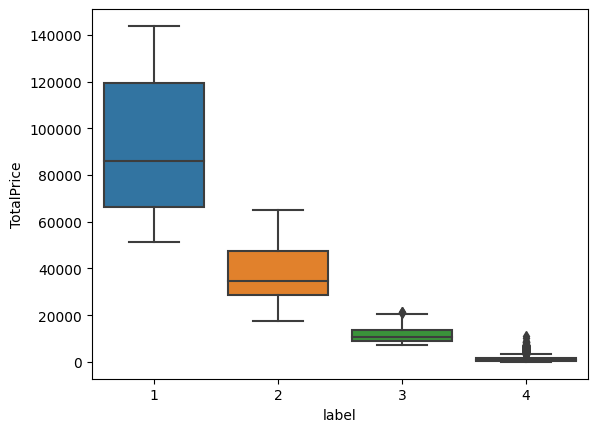

In [58]:
sns.boxplot(x='label', y='TotalPrice', data=clustered_data);

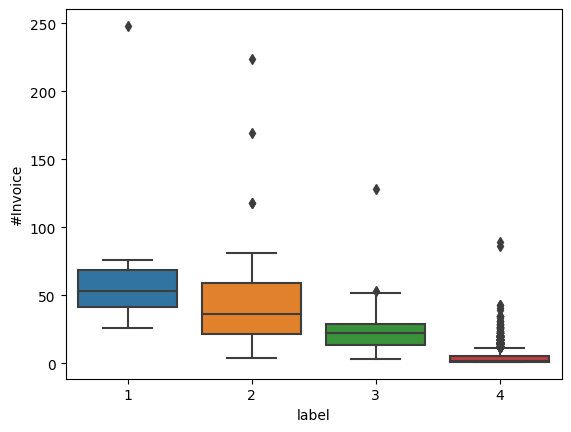

In [57]:
sns.boxplot(x='label', y='#Invoice', data=clustered_data);

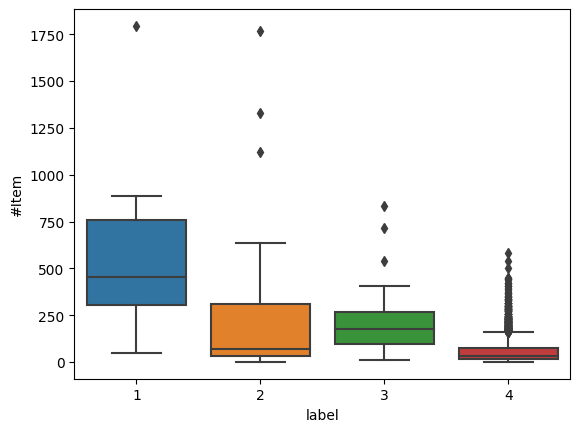

In [59]:
sns.boxplot(x='label', y='#Item', data=clustered_data);

In [55]:
clustered_data

,#Invoice,#Item,#Quantity,#RQuantity,TotalPrice,TotalRPrice,MeanPrice,label
CustomerID,,,,,,,,
12347.0,7,103,2458,0,4310.00,-0.00,1.753458,4
12348.0,4,22,2341,0,1797.24,-0.00,0.767723,4
12349.0,1,73,631,0,1757.55,-0.00,2.785341,4
12350.0,1,17,197,0,334.40,-0.00,1.697462,4
12352.0,11,59,536,66,2506.04,960.63,4.675448,4
...,...,...,...,...,...,...,...,...
18280.0,1,10,45,0,180.60,-0.00,4.013333,4
18281.0,1,7,54,0,80.82,-0.00,1.496667,4
18282.0,3,12,103,5,178.05,1.45,1.728641,4
